# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [ ]:
# Allowded to use only these libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory data analysis

In [ ]:
data = pd.read_csv('/content/Position_Salaries.csv')
data.describe()


,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [ ]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


<Axes: xlabel='Level', ylabel='Salary'>

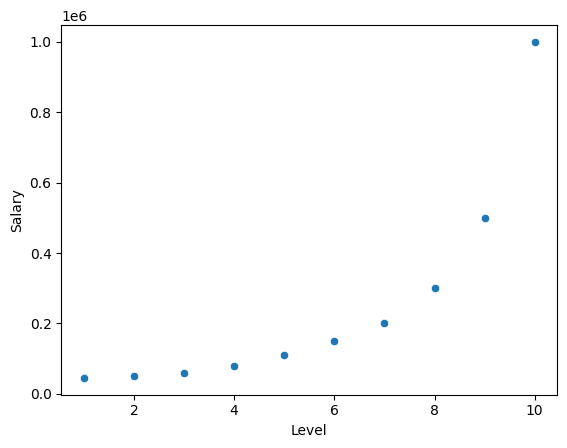

In [ ]:
sns.scatterplot(x='Level', y='Salary', data=data)

### Based on the exploratory data analysis, answer the following


* Can you use a simple linear regression model to fit this data (Yes/No)?
> No we cannot use a simple linear regression here as we can see from the scatterplot above that the 'Salary' and 'Level' attribute have a non-linear relationship.
* If you use a simple linear model to fit this data, will it fit well (Yes/No)?
> No, if we use a linear model here, it would lead to underfitting.
* Explain why you said yes or no to the above questions.
>We use a simple linear regression only when the independent and dependent variables have a linear relationship i.e. if the independent variable increases, the dependent variable increases or decreases at the same rate. But, in this case we can see that the Salary is varying exponentially as the Level increases. A linear regression model cannot capture this relationship and would lead to underfitting.



## Polynomial Regression

**Construct a second order Model:** $$\;\;\;\;
\hat y = w_1 x_1^2 + w_2x_1 + b
$$

**Construct a Cost function:**
$$MSE(w_1,w_2,b)= your\;answer$$

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x = data.iloc[:, 1].values
y = data.iloc[:, 2].values
print(x)
print(y)

[ 1  2  3  4  5  6  7  8  9 10]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


           2
1.943e+04 x - 1.329e+05 x + 2.322e+05


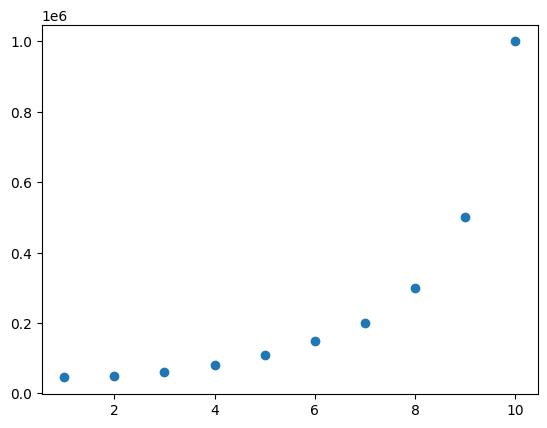

In [ ]:
plt.scatter(x,y)
p= np.polyfit(x,y,2)
f= np.poly1d(p)
print(f)

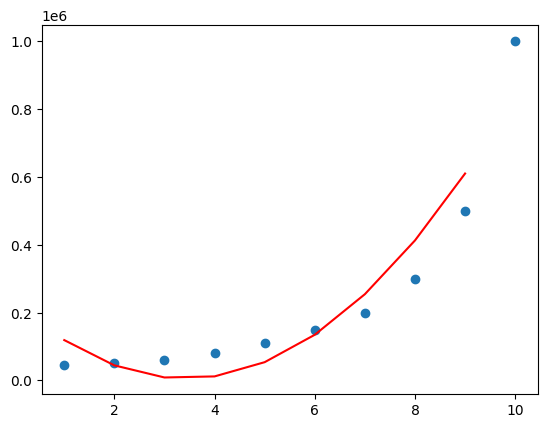

In [ ]:
x_new=np.arange(min(x),max(x))
y_model=f(x_new)
plt.scatter(x,y)
plt.plot(x_new,y_model,'red')

In [ ]:
#the polynomial features
X = np.vstack([x**2, x]).T

In [ ]:
#least square
coeff = np.linalg.lstsq(X, y, rcond=None)[0]

In [25]:
new_level=7.5
pred_salary = np.dot(coeff, [new_level**2, new_level])
print('$',pred_salary)

$ 363986.85651697684


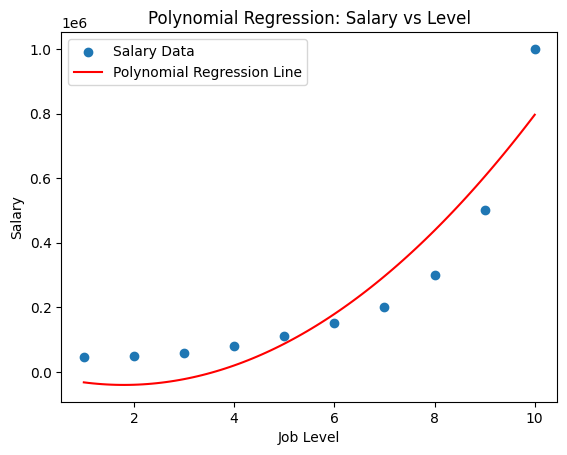

In [ ]:
plt.scatter(x, y, label='Salary Data')
x_fit = np.linspace(min(x), max(x), 100)  # Generate points for the fitted curve
y_fit = coeff[0] * x_fit**2 + coeff[1] * x_fit
plt.plot(x_fit, y_fit,'red',label='Polynomial Regression Line')
plt.xlabel('Job Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression: Salary vs Level')
plt.legend()
plt.show()

### By analysing the cost function, answer the following


* Can you use mean squared error as the cost function (Yes/No)?
>Yes
* Explain why you said yes or no to the above questions.
> It minimizes the error by using square of error terms

**Derivatives of cost function:**
$$Your \; answer$$

**Gradient Descent Algorithm:**
```
Repeat until converges:
```
$$your\;answer$$

## Implementation of the model

$ 363986.85651697684


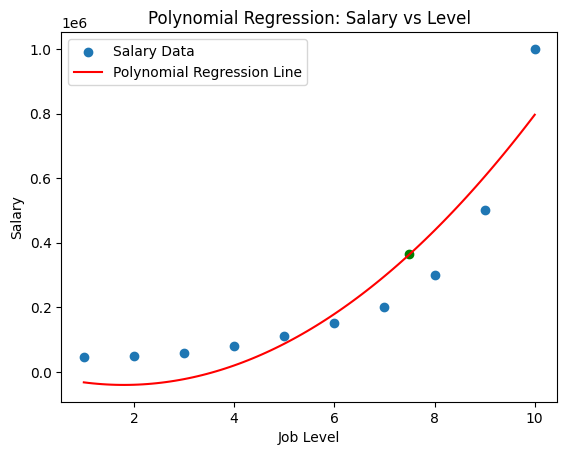

In [31]:
# mark the point or result in the graph (plot)
plt.scatter(x, y, label='Salary Data')
x_fit = np.linspace(min(x), max(x), 100)  # Generate points for the fitted curve
y_fit = coeff[0] * x_fit**2 + coeff[1] * x_fit
plt.plot(x_fit, y_fit,'red',label='Polynomial Regression Line')
plt.xlabel('Job Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression: Salary vs Level')
plt.legend()


print('$',pred_salary)
plt.scatter([7.5], [363986.85651697684], color='green')
plt.show()

# Estimate the model performance

### Answer the following

* What is learning rate?
>It is the rate at which the model learn or the stepsize of gradient descend
* What will happen if the learning rate is too large?
> * the stepsize of gradient descend will increase and it may not converge at all
* What will happen if the learning rate is too small?
> Tthe step size would be very small. It may take a lot more iterations
* If you what to change the second order (quadratic) model to third order model what all things will change in the above code?
> the polynomial equation and MSE would change